In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl

1.Data

In [3]:
from tensorflow.keras.datasets import fashion_mnist
(x_train_set,y_train_set),(x_test,y_test)=fashion_mnist.load_data()

In [4]:
x_train_set=x_train_set/255.0
x_test=x_test/255.0

In [5]:
x_train_set.shape,y_train_set.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

0


<function matplotlib.pyplot.show(close=None, block=None)>

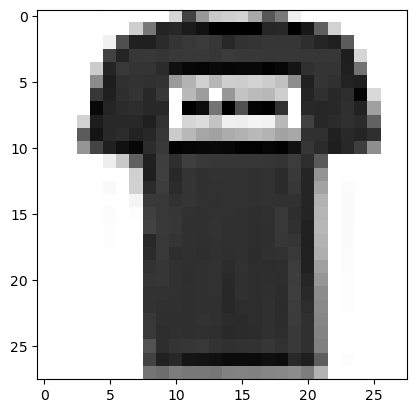

In [6]:
i=1
print(y_train_set[i])
plt.imshow(x_train_set[i],cmap='binary')
plt.show

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_valid,y_train,y_valid=train_test_split(
    x_train_set,y_train_set,random_state=1)

堆疊自動編碼網路stack autoencoder

build model

In [8]:
tf.random.set_seed(1)
np.random.seed(1)

In [9]:
sk_encoder=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100,activation='selu'),
    keras.layers.Dense(30,activation='selu'),
])

sk_decoder=keras.models.Sequential([
    keras.layers.Dense(100,activation='selu',input_shape=[30]),
    keras.layers.Dense(28*28,activation='sigmoid'),
    keras.layers.Reshape([28,28])
])

sk_ae=keras.models.Sequential([sk_encoder,sk_decoder])

In [10]:
sk_encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
Total params: 81530 (318.48 KB)
Trainable params: 81530 (318.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
sk_decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               3100      
                                                                 
 dense_3 (Dense)             (None, 784)               79184     
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 82284 (321.42 KB)
Trainable params: 82284 (321.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
sk_ae.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 30)                81530     
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            82284     
                                                                 
Total params: 163814 (639.90 KB)
Trainable params: 163814 (639.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


compile

In [13]:
def rounded_accuracy(y_true,y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true),tf.round(y_pred))

In [14]:
sk_ae.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=1.5),
    metrics=[rounded_accuracy])

In [15]:
train = sk_ae.fit(x_train, x_train, epochs=20, validation_data=(x_valid, x_valid))

Epoch 1/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3452 - rounded_accuracy: 0.8821 - val_loss: 0.3150 - val_rounded_accuracy: 0.9032
Epoch 2/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3090 - rounded_accuracy: 0.9125 - val_loss: 0.3079 - val_rounded_accuracy: 0.9106
Epoch 3/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3020 - rounded_accuracy: 0.9185 - val_loss: 0.3009 - val_rounded_accuracy: 0.9148
Epoch 4/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2980 - rounded_accuracy: 0.9220 - val_loss: 0.2964 - val_rounded_accuracy: 0.9242
Epoch 5/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2952 - rounded_accuracy: 0.9245 - val_loss: 0.2988 - val_rounded_accuracy: 0.9176
Epoch 6/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2931 - rounded_accuracy: 0.9262 - val_loss: 0.2917 - val_rounded_accuracy: 0.9261
Epoch 7/20
1407/1407 [==================

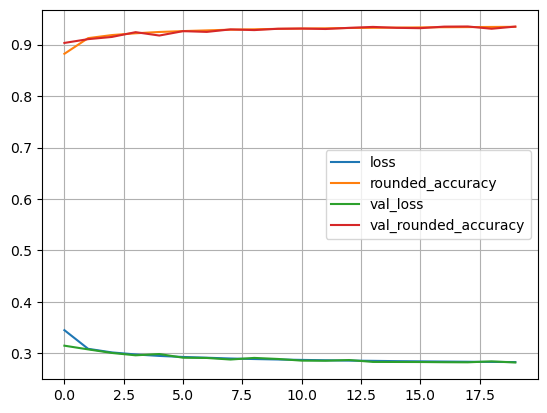

In [16]:
pd.DataFrame(train.history).plot()
plt.grid(True)
plt.show()

In [17]:
sk_ae.evaluate(x_test,x_test)

313/313 [==============================] - 0s 909us/step - loss: 0.2857 - rounded_accuracy: 0.9334


[0.28565308451652527, 0.9333509206771851]

In [18]:
x_test_decoded=sk_ae.predict(x_test)

313/313 [==============================] - 0s 627us/step


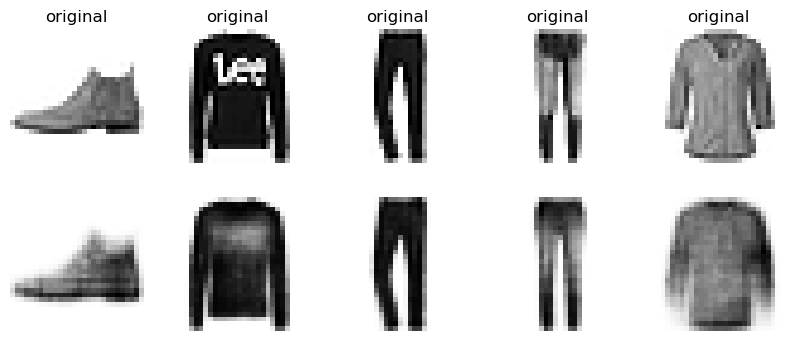

In [19]:
plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(2,5,1+i)
    plt.imshow(x_test[i],cmap='binary')
    plt.title('original')
    plt.axis('off')
    
    plt.subplot(2,5,1+5+i)
    plt.imshow(x_test_decoded[i],cmap='binary')
    plt.axis('off')
plt.show()

In [20]:
x_test_codings=sk_encoder.predict(x_test)
x_test_codings.shape

313/313 [==============================] - 0s 480us/step


(10000, 30)

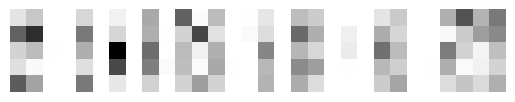

In [21]:
i=range(5)
plt.imshow(x_test_codings[i],cmap='binary')
plt.axis('off')
plt.show()

application

In [22]:
from sklearn.manifold import TSNE
np.random.seed(1)
tsne=TSNE()
x_test_2D=tsne.fit_transform(x_test_codings)
x_test_2D=(x_test_2D-x_test_2D.min())/(x_test_2D.max()-x_test_2D.min())
                             

In [27]:
x_test_2D.shape

(10000, 2)

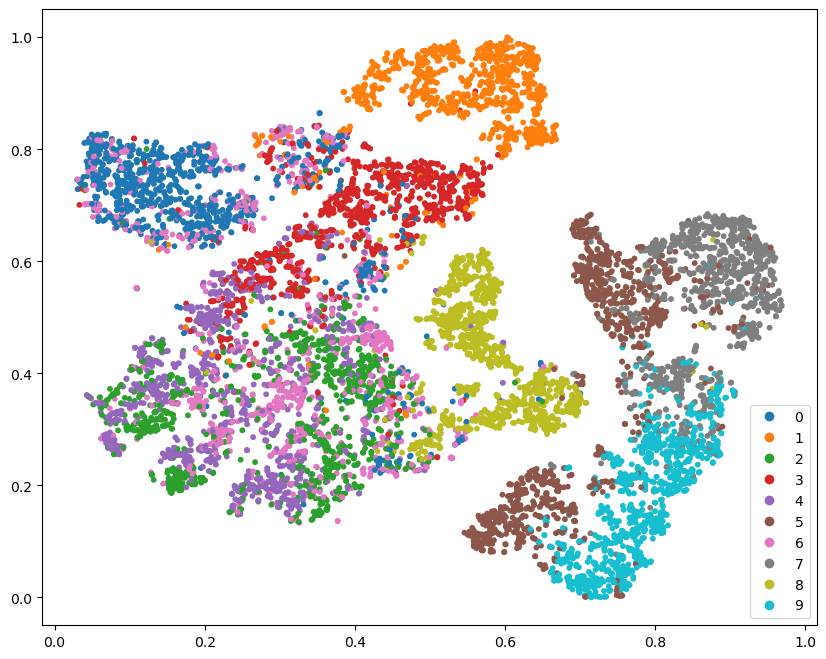

In [28]:
plt.figure(figsize=(10,8))
scatter=plt.scatter(x_test_2D[:,0],x_test_2D[:,1],c=y_test,s=10,
                    cmap=plt.cm.tab10)

plt.legend(*scatter.legend_elements())
plt.show()

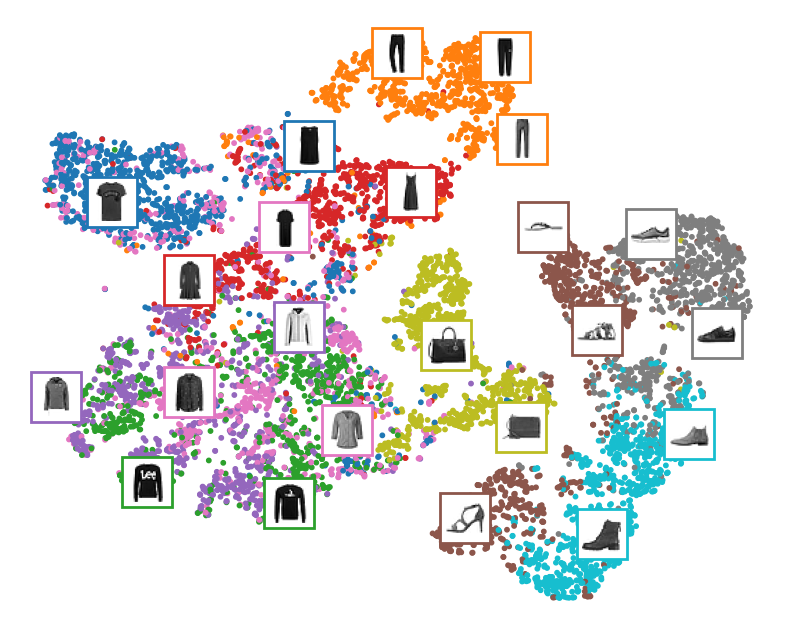

In [34]:
plt.figure(figsize=(10,8))
plt.scatter(x_test_2D[:, 0],x_test_2D[:,1],c=y_test,s=10,cmap=plt.cm.tab10)
plt.axis( 'off')
image_positions = np.array([[1., 1.]])
for index, position in enumerate(x_test_2D):
    dist = np.sum((position - image_positions)**2, axis=1)
    if np.min(dist) > 0.02:
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(x_test[index],cmap='binary'),position,
            bboxprops={'edgecolor':plt.cm.tab10(y_test[index]), 'lw': 2})
        plt.gca().add_artist(imagebox)
plt. show()